<a href="https://colab.research.google.com/github/mohitiitr/bb84piby8basis/blob/master/BB84piby8basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install qiskit

# BB84 Quantum Key Distribution (QKD) Protocol Using Basis (pi/8,0)and(5pi/8,0). 
 
BB84 is a quantum key distribution scheme developed by Charles Bennett and Gilles Brassard in 1984 ([paper]).
This file discuss the case without evesdroppers.

The basis are given name as M basis .

First is $cos (\pi/8) \ket{0} +sin(\pi/8)\ket{1}$ denoted by everywhere further by $ \ket{m1/8}$.

Second is  $cos (5\pi/8) \ket{0} +sin(5\pi/8)\ket{1}$ denoted by everywhere further by $ \ket{m5/8}$.

[paper]: http://researcher.watson.ibm.com/researcher/files/us-bennetc/BB84highest.pdf 

$$ \newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

In [6]:
from qiskit import BasicAer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import IBMQ

from qiskit.tools.monitor import job_monitor
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Visualing States of M basis 

In this section there is the code to help us see the visual form of our considered M basis on Bloch Sphere.

In [0]:
BasicAer.backends()
backend = BasicAer.get_backend('statevector_simulator')

Job Status: job has successfully run


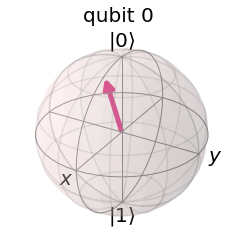

In [8]:
m18 = QuantumRegister (1)
c18 = ClassicalRegister(1)
circ2 =QuantumCircuit(m18,c18)
circ2.ry(pi/8, m18)


job1 =execute(circ2,backend)
job_monitor(job1)
result1=job1.result()
chi=result1.get_statevector(circ2)
plot_bloch_multivector(chi)

Job Status: job has successfully run


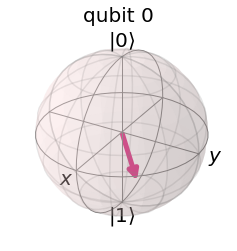

In [11]:
m58 = QuantumRegister (1)
c58 = ClassicalRegister(1)
circ3 =QuantumCircuit(m58,c58)
circ3.x(m58)
circ3.ry(pi/8, m58)


job2 =execute(circ3,backend)
job_monitor(job2)
result2=job2.result()
chi_anti_polar=result2.get_statevector(circ3)
plot_bloch_multivector(chi_anti_polar)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


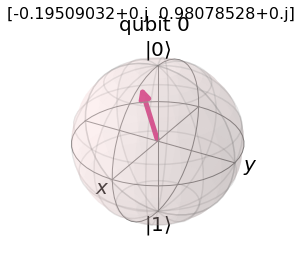

In [13]:
plot_bloch_multivector(chi,chi_anti_polar)


## Choosing bases and encoding states

Alice generates two binary strings. One encodes the basis for each qubit:

0 $\rightarrow$ Computational basis

1  $\rightarrow$ M basis

The other encodes the state:

0  $\rightarrow \ket{ 0 } or \ket{m1/8} $ 

1  $\rightarrow \ket{ 1 } or \ket{m5/8} $ 

Bob also generates a binary string and uses the same convention to choose a basis for measurement


In [14]:
num_qubits = 24 


alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)


print(alice_state)
print(alice_basis)
print(bob_basis)

[1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1]
[0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1]
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0]


## Creating the circuit

Based on the following results:

$X\ket{0} = \ket{1}$

$Ry(\pi/8,0)\ket{0} = \ket{m1/8}$


$ Ry(\pi/8,0)X\ket{0} = \ket{m5\pi/8}$

Our algorithm to construct the circuit is as follows:

1. Whenever Alice wants to encode 1 in a qubit, she applies an $X$ gate to the qubit. To encode 0, no action is needed.
2. Wherever she wants to encode it in the M basis, she applies an $Ry(\pi/8)$ gate. No action is necessary to encode a qubit in the computational basis.

3. She then _sends_ the qubits to Bob (symbolically represented in this circuit using wires)

4. Bob measures the qubits according to his binary string. To measure a qubit in the M basis, he applies an $Ry(-\pi/8)$ gate to the corresponding qubit and then performs a mesurement on the computational basis. (Here $-\pi/8$ can be interpreted as $+(2\pi-\pi/8)$  rotation of theta ) 



In [15]:
q = QuantumRegister(num_qubits,'q')
c = ClassicalRegister(num_qubits,'c')

bb84 = QuantumCircuit(q,c,name='bb84')

# Alice prepares her qubits
for index, _ in enumerate(alice_basis):
    if alice_state[index] == 1:
        bb84.x(q[index])
    if alice_basis[index] == 1:
        bb84.ry(pi/8 , q[index])
bb84.barrier()  

# Bob measures the received qubits
for index, _ in enumerate(bob_basis):
    if bob_basis[index] == 1:
        bb84.ry(-pi/8 ,q[index])
        
bb84.barrier()        
bb84.measure(q,c)
    
            
bb84.draw()


In [0]:
#USE THESE LINES TO RUN THE CODE ON IBMQ MACHINES WITH YOUR IDENTIFICATION TOKEN

# token = ''
# IBMQ.enable_account(token)
# IBMQ.backends()



[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]

## Performing the actual experiment

Run the code on the desired backend. Use the cell above to authenticate yourself to the IBMQ network.

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
# backend = IBMQ.get_backend('ibmq_16_melbourne')
# backend = IBMQ.get_backend('ibmq_qasm_simulator')

job = execute(bb84,backend,shots=1024)

job_monitor(job)

result = job.result()
counts = result.get_counts()

# Prints out all the measured binary strings by Bob (reversed)
for count in [*counts]:
    print(count) 

Job Status: job has successfully run
110111100110001000001101
110111100101001100001100
110111101111011100001101
110111100111001001001101
110111100111011110001101
110111000111001101001101
110110100011001100001101
010111100111001000001101
110111100010001000001101
110111100001001100001101
110111100111011100001101
110111100011001101001101
110111101111001110101101
010111100111011000001101
110111101111001100000101
111110100111001100001101
010111000101001100001101
110110100110001100001101
110111101011001101000101
110110100111001100001101
110111100111001101001101
110111000110001100001101
110111100011011100001101
110111100111001100000100
111111101111001100001101
010111100110001100001101
110111100101001100000101
110110100111000100001101
110110000111000100001101
111110100111001100101101
110111100110011100001101
110111100111011000001101
100111100111001100101101
110111100011001000001101
110111100111000101101101
110111000111001100000101
110111100100001100001101
000111101111001100001101
1101111001110

In [19]:
for i,temp_key in enumerate([*counts]):
    temp_key_rev = temp_key[::-1] # qubit orders are reversed in qiskit
    alice_key = ''
    bob_key= ''
    for i in range(num_qubits):
        if alice_basis[i] == bob_basis[i]: # Only choose bits where Alice and Bob chose the same basis
             bob_key += str(temp_key_rev[i])
             alice_key += str(alice_state[i])
    print (alice_key + "       "+bob_key)

0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011       0100011
0100011   